<a href="https://colab.research.google.com/github/inehayadav/Dental-Metrics/blob/main/Using_Dental_Metrics_to_Predict_Gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load dataset
data = pd.read_csv('/content/Dentistry Dataset.csv')

# Display first few rows of the dataset
print(data.head())

   Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
0      1        NaN   24  Female                            25.06   
1      2        NaN   22  Female                            25.78   
2      3        NaN   23  Female                            23.83   
3      4        NaN   20  Female                            26.12   
4      5        NaN   20  Female                            26.36   

   intercanine distance casts  right canine width intraoral  \
0                       25.05                          6.08   
1                       25.79                          6.13   
2                       23.83                          5.91   
3                       26.12                          6.08   
4                       26.41                          6.09   

   right canine width casts  left canine width intraoral  \
0                      6.08                         6.09   
1                      6.13                         6.33   
2                      5.9

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values with mean for numerical columns
for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]): # Check if column is numeric
        data[col].fillna(data[col].mean(), inplace=True)

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64


In [ ]:
# Encode the 'Gender' column (Male = 1, Female = 0)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [ ]:
# Drop 'Sl No' and 'Sample ID' since they are not relevant for prediction
data = data.drop(columns=['Sl No', 'Sample ID'])

In [ ]:
# Define features (independent variables) and target (dependent variable)
X = data.drop(columns=['Gender'])  # Independent variables
y = data['Gender']  # Target variable

In [ ]:
# Normalize the independent variables (X)
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)

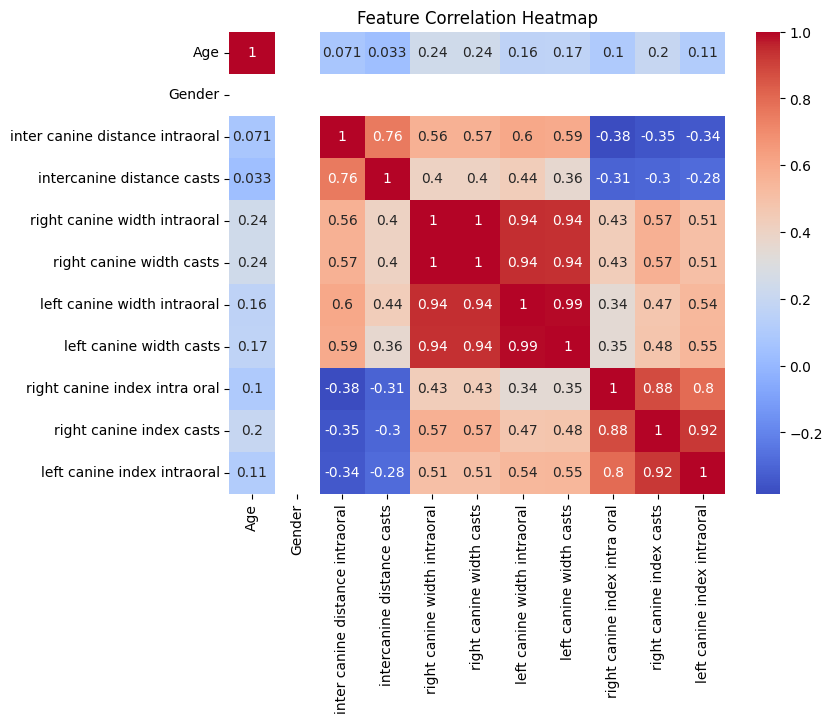

In [ ]:
# Plot heatmap for correlation between features
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(X, columns=data.columns[:-1]).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [ ]:
# Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on test data
y_pred_logreg = logreg.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.77      0.46      0.57       169
           1       0.60      0.86      0.71       161

    accuracy                           0.65       330
   macro avg       0.69      0.66      0.64       330
weighted avg       0.69      0.65      0.64       330



In [ ]:
# Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Predict on test data
y_pred_dtree = dtree.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dtree))

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       169
           1       0.80      0.90      0.85       161

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.85      0.84      0.84       330



In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Predict on test data
y_pred_rfc = rfc.predict(X_test)

# Evaluate Random Forest
print("Random Forest Report:\n", classification_report(y_test, y_pred_rfc))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       169
           1       0.89      0.88      0.88       161

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330



In [ ]:
# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb.predict(X_test)

# Evaluate XGBoost
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       169
           1       0.89      0.87      0.88       161

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330



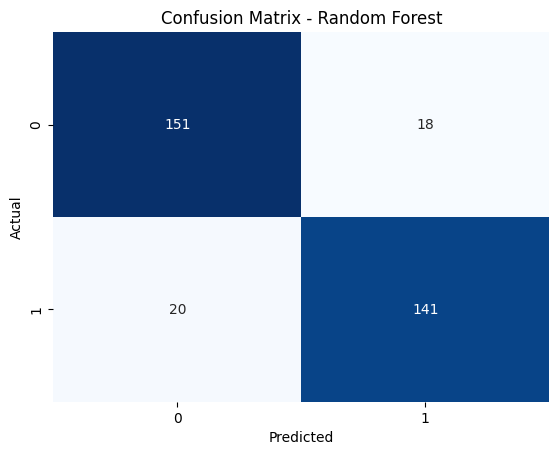

In [ ]:
# Confusion Matrix for the best model (e.g., Random Forest)
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

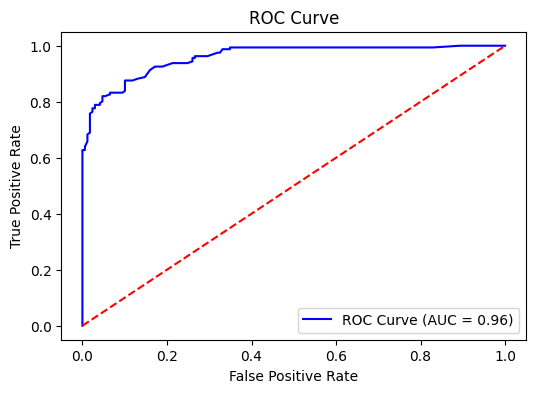

In [ ]:
# ROC Curve for Random Forest
y_pred_prob = rfc.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
# Importing the evaluation metric for accuracy score
from sklearn.metrics import accuracy_score

# Calculating accuracy for each model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print out the accuracy of each model
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")
print(f"Decision Tree Accuracy: {accuracy_dtree * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rfc * 100:.2f}%")
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")

Logistic Regression Accuracy: 65.15%
Decision Tree Accuracy: 83.94%
Random Forest Accuracy: 88.48%
XGBoost Accuracy: 88.18%


In [ ]:
# Create a dictionary to summarize model performances
model_performance = {
    "Logistic Regression": accuracy_logreg,
    "Decision Tree": accuracy_dtree,
    "Random Forest": accuracy_rfc,
    "XGBoost": accuracy_xgb
}

# Print out the model performances
print("\nModel Performance Summary:")
for model, acc in model_performance.items():
    print(f"{model}: {acc * 100:.2f}% Accuracy")


Model Performance Summary:
Logistic Regression: 65.15% Accuracy
Decision Tree: 83.94% Accuracy
Random Forest: 88.48% Accuracy
XGBoost: 88.18% Accuracy


In [ ]:
# Calculating ROC-AUC for each model
from sklearn.metrics import roc_auc_score

# Predicting probabilities for ROC AUC
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc_dtree = roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1])
roc_auc_rfc = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])
roc_auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

# Print out the ROC-AUC scores
print(f"\nLogistic Regression ROC-AUC: {roc_auc_logreg:.2f}")
print(f"Decision Tree ROC-AUC: {roc_auc_dtree:.2f}")
print(f"Random Forest ROC-AUC: {roc_auc_rfc:.2f}")
print(f"XGBoost ROC-AUC: {roc_auc_xgb:.2f}")


Logistic Regression ROC-AUC: 0.71
Decision Tree ROC-AUC: 0.84
Random Forest ROC-AUC: 0.96
XGBoost ROC-AUC: 0.95


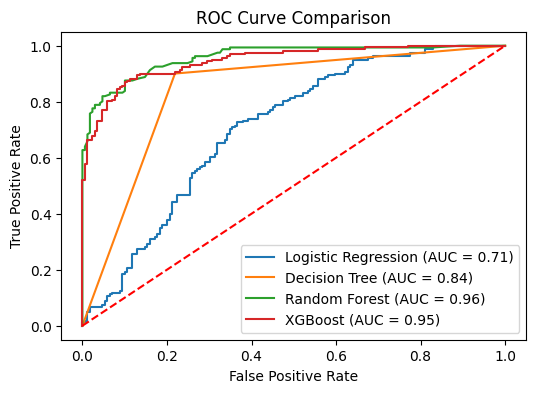

In [ ]:
# Plot ROC Curves for all models
plt.figure(figsize=(6, 4))

# Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')

# Decision Tree
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, dtree.predict_proba(X_test)[:, 1])
plt.plot(fpr_dtree, tpr_dtree, label=f'Decision Tree (AUC = {roc_auc_dtree:.2f})')

# Random Forest
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {roc_auc_rfc:.2f})')

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# Plot details
plt.plot([0, 1], [0, 1], 'r--')  # Random guessing line
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()